In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
EP6 = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP6_total3.csv")
EP7 = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP7_total3.csv")
EP8 = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP8_total3.csv")



*   0 not an MEP [at the time of the vote]
*   1 for
*   2 against
*   3 abstention
*   4 absent
* 5 did not vote
*6 motivated [only for EP6: MEP was absent, but this was explained by a certificate]










In [6]:

# Loop through columns based on column indices
for i in range(7,100):
    column_name = EP6.columns[i]
    class_counts = EP6[column_name].value_counts()
    total_count = class_counts.sum()

    print(f"Column '{column_name}' class distribution:")
    for class_value, count in class_counts.items():
        percentage = (count / total_count) * 100
        print(f"{class_value}: {count} ({percentage:.2f}%)")
    print()
 


Column '28302' class distribution:
0: 1129 (90.10%)
2: 42 (3.35%)
1: 39 (3.11%)
5: 23 (1.84%)
4: 17 (1.36%)
3: 3 (0.24%)

Column '28975' class distribution:
1: 674 (53.79%)
2: 195 (15.56%)
5: 160 (12.77%)
3: 117 (9.34%)
4: 107 (8.54%)

Column '28367' class distribution:
1: 985 (78.61%)
5: 122 (9.74%)
4: 92 (7.34%)
2: 43 (3.43%)
3: 11 (0.88%)

Column '28512' class distribution:
2: 439 (35.04%)
3: 393 (31.36%)
1: 201 (16.04%)
5: 198 (15.80%)
4: 22 (1.76%)

Column '28246' class distribution:
1: 914 (72.94%)
5: 163 (13.01%)
2: 68 (5.43%)
4: 58 (4.63%)
3: 50 (3.99%)

Column '2107' class distribution:
1: 996 (79.49%)
5: 98 (7.82%)
2: 78 (6.23%)
4: 52 (4.15%)
3: 29 (2.31%)

Column '28620' class distribution:
1: 1019 (81.32%)
5: 122 (9.74%)
4: 51 (4.07%)
2: 40 (3.19%)
3: 21 (1.68%)

Column '28363' class distribution:
0: 582 (46.45%)
1: 458 (36.55%)
5: 93 (7.42%)
4: 90 (7.18%)
2: 20 (1.60%)
3: 10 (0.80%)

Column '28276' class distribution:
1: 932 (74.38%)
5: 184 (14.68%)
4: 73 (5.83%)
2: 48 (3.

In [ ]:
EP6_2 = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP6_RCVs.csv")
EP7_2 = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP7_RCVs.csv")
EP8_2 = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP8_RCVs.csv")

In [ ]:
EP8 = EP8.rename(columns = {"De/Policy area":"Policy_area"})

In [ ]:
EP6.columns

Index(['Unnamed: 0', 'Vote ID', 'raw_text', 'Type of Vote', 'Policy_area',
       'Title', '28469', '28302', '28975', '28367',
       ...
       '95017', '95019', '95014', '72754', '95298', '95280', '95281', '95704',
       '96101', '23852'],
      dtype='object', length=946)

In [ ]:
EP6 = EP6.drop(["Unnamed: 0"],axis=1)
EP7 = EP7.drop(["Unnamed: 0"],axis=1)
EP8 = EP8.drop(["Unnamed: 0"],axis=1)

In [ ]:
import numpy as np


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

from nltk import word_tokenize, WordNetLemmatizer#, pos_tag, pos_tag_sents, sent_tokenize
from nltk.corpus import stopwords#, wordnet

class LemmaTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`']
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
      res=[]
      for token in word_tokenize(doc):
        word=''.join(filter(str.isalnum, token))
        if ((word not in self.ignore_tokens) and (len(self.wnl.lemmatize(word))>2) and not (any(char.isdigit() for char in word))): 
          res.append(self.wnl.lemmatize(word))
      return res

stop_words = stopwords.words('english')
#stop_words.extend(["more","stop","words"])

tokenizer = LemmaTokenizer()
token_stop = list(set(tokenizer(' '.join(stop_words))))
token_stop.sort()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Preprocessing of the data EP6

In [ ]:
EP6["raw_text"].isna().sum() #quitar las instancias que no tienen texto


409

In [ ]:
print(EP6["Type of Vote"].isna().sum())
print(EP6["Policy_area"].isna().sum())
print(EP6["Title"].isna().sum())

5
0
0


In [ ]:
EP6  = EP6.dropna(subset=['raw_text'])
# Fill NaN values with empty strings
EP6.fillna('', inplace=True)


<ipython-input-11-b873e7f3cf1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EP6.fillna('', inplace=True)


In [ ]:
EP6.shape

(844, 945)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
# define the columns to transform
text_columns = ['raw_text', 'Type of Vote', 'Policy_area', 'Title']

# define the transformer
transformer = ColumnTransformer(
    transformers=[
        ('raw_text', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'raw_text'),
        ('Type of Vote', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'Type of Vote'),
        ('Policy_area', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'Policy_area'),
        ('Title', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'Title')
    ])

# fit and transform the data
tfidf_array = transformer.fit_transform(EP6[text_columns])




/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# get the feature names for the raw_text column

features = transformer.named_transformers_['raw_text'].get_feature_names_out()
features2 = transformer.named_transformers_['Type of Vote'].get_feature_names_out()
features3 = transformer.named_transformers_['Policy_area'].get_feature_names_out()
features4 = transformer.named_transformers_['Title'].get_feature_names_out()

# print the feature names
print(features)
print(features2)
print(features3)
print(features4)

['abandonment' 'abide' 'ability' ... 'young' 'young people' 'zone']
['joint' 'joint motion' 'joint motion resolution' 'legislative'
 'legislative resolution' 'motion' 'motion resolution'
 'motion resolution whole' 'report' 'resolution' 'resolution whole'
 'whole']
['affair' 'agriculture' 'budget' 'civil' 'civil liberty'
 'civil liberty justice' 'economics' 'environment' 'environment public'
 'environment public health' 'foreign' 'foreign security'
 'foreign security policy' 'health' 'home' 'home affair' 'juridical'
 'juridical affair' 'justice' 'justice home' 'justice home affair'
 'liberty' 'liberty justice' 'liberty justice home' 'policy' 'public'
 'public health' 'security' 'security policy' 'tourism' 'transport'
 'transport tourism']
['agreement' 'european']


In [ ]:
print(tfidf_array.shape)

(844, 6488)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Define the range of dimensions to test
num_dimensions = range(1, 45)

# Store the explained variance ratio for each number of dimensions
explained_variances = []
for i in num_dimensions:
    lsa_model = TruncatedSVD(n_components=i, random_state=420)
    lsa_comps = lsa_model.fit_transform(tfidf_array)
    explained_variances.append(lsa_model.explained_variance_ratio_.sum())
    print(i, lsa_model.explained_variance_ratio_.sum())




1 0.07819433925371291
2 0.18871198589955718
3 0.2472866561883246
4 0.2993187676593708
5 0.3448056887592305
6 0.38227291135401525
7 0.41583055324348767
8 0.4471101362795638
9 0.4766174278408469
10 0.5031935204105107
11 0.5278678647109449
12 0.5513355226275577
13 0.5729351876036707
14 0.593105770030591
15 0.6122403331025884
16 0.6291886676093811
17 0.6428685243000558
18 0.6543757906484792
19 0.6644971030426045
20 0.6742739769806326
21 0.6830735446941447
22 0.6908831434432131
23 0.6982828736406228
24 0.7052102650337492
25 0.7116450609081872
26 0.7177263822652314
27 0.7236871874098311
28 0.7291711798849705
29 0.7343933750822941
30 0.7395876559237552
31 0.7443710357627061
32 0.7488621732166152
33 0.7533401272115552
34 0.7575630796934685
35 0.7616107194487105
36 0.7655694681573543
37 0.7692326167979844
38 0.7728264110503756
39 0.7763465705923523
40 0.7797106279823303
41 0.7829803364003214
42 0.7861751078867266
43 0.789415229061828
44 0.7924973592445772


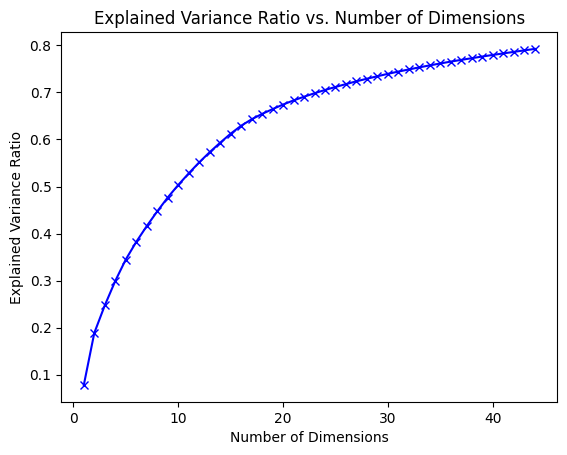

In [ ]:
# Plot the explained variance ratio as a function of number of dimensions
plt.plot(num_dimensions, explained_variances, 'bx-')
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Dimensions')
plt.show()

In [ ]:
from sklearn.decomposition import TruncatedSVD
number_dimensions = 21
lsa_model = TruncatedSVD(n_components=number_dimensions, random_state=420)
lsa_comps = lsa_model.fit_transform(tfidf_array)
print(lsa_model.explained_variance_ratio_.sum())

0.6830735446941447


In [ ]:
all_words = np.concatenate((transformer.named_transformers_['raw_text'].get_feature_names_out(),
                transformer.named_transformers_['Type of Vote'].get_feature_names_out(),
                transformer.named_transformers_['Policy_area'].get_feature_names_out(),
                transformer.named_transformers_['Title'].get_feature_names_out()))

In [ ]:
df_documents = pd.DataFrame(lsa_comps) #ya no son 4388 palabras, ahora cada columna es un componente de lsa (21 dimensiones, 21 temas) y cada columna es un documento
df_lsa = pd.DataFrame(lsa_model.components_,columns=all_words).T

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/docs_EP6.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 df_documents.to_csv(f)
 #all documents by topics

## Create a model for each MEP--> EP6
Changes:
> max_features = 9000 the avg accuracy is 69% with logistic regression and 40 on SVD

> max_features = 9000 the avg accuracy is 71% with logistic regression and 40 on SVD


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

# Create a dictionary to store MEP names as keys and accuracy values as values
accuracy_results = {}

# Loop through each MEP column and train a separate model for each MEP
for col in EP6.columns[5:]:
    # Step 1: Prepare the data
    X = lsa_comps # Input features (TF-IDF + truncated SVD features)
    y = EP6[col].values # Target variable (voting behavior of the MEP)
    
    # Check the number of unique classes in the target variable
    num_classes = len(np.unique(y))
    if num_classes < 2:
        print(f"Skipping MEP {col} due to only one class present.")
        continue
    
    # Step 2: Split the data into training and testing sets
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Step 3: Choose and configure the model
    model = Pipeline([
        ('scaler', StandardScaler()), # You can apply additional preprocessing steps as needed
        ('classifier', RandomForestClassifier()) # Change the classifier as needed (e.g., DecisionTreeClassifier, RandomForestClassifier, SVC, MLPClassifier)
    ])
    
    # Step 4: Train the model
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    importances = np.zeros(X.shape[1])
    importances /= cv.n_splits
    feature_names = ['feature_' + str(i) for i in range(X.shape[1])]
    feature_importances = dict(zip(feature_names, importances))

    accuracy_results[col] = {'accuracy': np.mean(accuracy_scores), 'feature_importances': feature_importances}
# Convert the accuracy_results dictionary to a DataFrame
accuracy_df = pd.DataFrame.from_dict(accuracy_results, orient='index')

# Add the MEP column to the DataFrame
accuracy_df = accuracy_df.reset_index().rename(columns={'index': 'MEP'})

# Split the feature_importances column into separate columns for each feature
accuracy_df = accuracy_df.join(pd.DataFrame(accuracy_df['feature_importances'].to_dict()).T)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
accuracy_df.describe()

,accuracy,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
mean,0.673002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.217334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.520132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.548605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.577078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.749436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.921795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get the minimum and maximum accuracy values
min_accuracy = accuracy_df['accuracy'].min()
max_accuracy = accuracy_df['accuracy'].max()
median_accuracy = accuracy_df['accuracy'].median()
mean_accuracy = accuracy_df['accuracy'].mean()

# Print the results
print(f"Minimum Accuracy: {min_accuracy}")
print(f"Maximum Accuracy: {max_accuracy}")
print(f"Median Accuracy: {median_accuracy}")
print(f"Mean Accuracy: {mean_accuracy}")


Minimum Accuracy: 0.38742603550295857
Maximum Accuracy: 0.9928923640462102
Median Accuracy: 0.752373908143139
Mean Accuracy: 0.7352495985759686


Guardar los documentos de accuracy y feature importance, para ya no tener que volver a correrlos y después hacer lo demás en otro programa para no saturarlo tanto

## Inspect accuracy by Party (Europarties EPG)

In [ ]:
accuracy_df.dtypes
accuracy_df['MEP'] = accuracy_df['MEP'].astype('int64')

In [ ]:
EP6_accuracies = accuracy_df.merge( EP6_2[['EPG', 'WebisteEpID','Country']], how = "left", left_on = "MEP", right_on = "WebisteEpID" )
EP6_accuracies = EP6_accuracies.drop(["feature_importances","WebisteEpID"],axis=1)


In [ ]:
EP6_accuracies

,MEP,accuracy,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,EPG,Country
0,28469,0.520118,0.050311,0.062397,0.056506,0.049722,0.049350,0.054037,0.051770,0.042613,...,0.045679,0.050357,0.039744,0.048350,0.046810,0.044203,0.047160,0.048591,Confederal Group of the European United Left -...,Cyprus
1,28302,0.924162,0.078573,0.058207,0.049436,0.043287,0.048154,0.032238,0.046557,0.049913,...,0.053867,0.039775,0.050631,0.039248,0.031667,0.042216,0.046178,0.042277,Independence/Democracy Group,Poland
2,28975,0.564046,0.048238,0.068910,0.053964,0.044554,0.050629,0.043570,0.043928,0.050800,...,0.048631,0.040547,0.039917,0.061918,0.046212,0.046777,0.045483,0.044349,Confederal Group of the European United Left -...,Italy
3,28367,0.827022,0.076598,0.084998,0.067896,0.046228,0.039145,0.038849,0.043068,0.044082,...,0.044827,0.038464,0.039691,0.047804,0.041578,0.034645,0.039992,0.049814,Group of the European People's Party (Christia...,Italy
4,28512,0.453755,0.053943,0.066754,0.063251,0.043821,0.048269,0.041338,0.047380,0.041049,...,0.042965,0.040068,0.048560,0.046383,0.048432,0.045157,0.051735,0.047932,Non-attached Members,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,95280,0.886236,0.057114,0.054369,0.045463,0.052409,0.037403,0.040711,0.040297,0.042117,...,0.039416,0.035041,0.044194,0.040127,0.044802,0.054530,0.045923,0.083960,Socialist Group in the European Parliament,Romania
935,95281,0.885073,0.056062,0.052693,0.043624,0.054572,0.037751,0.041028,0.040744,0.040254,...,0.038639,0.037777,0.045254,0.039070,0.044145,0.053077,0.043020,0.080584,Socialist Group in the European Parliament,Romania
936,95704,0.930100,0.045294,0.059162,0.039665,0.058238,0.041546,0.041197,0.038407,0.045288,...,0.041344,0.040063,0.041240,0.035367,0.036429,0.045343,0.040803,0.085566,Group of the European People's Party (Christia...,Romania
937,96101,0.992892,0.043123,0.054028,0.162545,0.037428,0.033411,0.066342,0.068940,0.022995,...,0.063299,0.024215,0.069915,0.033282,0.025517,0.028307,0.049767,0.019094,Group of the European People's Party (Christia...,Spain


In [ ]:
EP6_accuracies.isna().sum()

MEP           0
accuracy      0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
EPG           0
Country       0
dtype: int64

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/EP6_accuracies2.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 EP6_accuracies.to_csv(f)
 #all MEPs with their accuracy, features, EPG and country

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/lsa2_EP6.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 df_lsa.to_csv(f)
 #all words by topics

# Construct the feature importance by country and by EPG and then save them to the Drive to use after

In [ ]:
EP6_countries= EP6_accuracies.groupby('Country').mean()
EP6_parties= EP6_accuracies.groupby('EPG').mean()

<ipython-input-88-5c7016399c66>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  EP6_countries= EP6_accuracies.groupby('Country').mean()
<ipython-input-88-5c7016399c66>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  EP6_parties= EP6_accuracies.groupby('EPG').mean()


In [ ]:
EP6_parties.head()

,MEP,accuracy,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
EPG,,,,,,,,,,,,,,,,,,,,,
Confederal Group of the European United Left - Nordic Green Left,22410.875000,0.594321,0.065505,0.071669,0.051495,0.044278,0.044970,0.044824,0.044409,0.044962,...,0.046336,0.043635,0.047279,0.043592,0.045167,0.046322,0.044216,0.043686,0.042988,0.046041
Group of the Alliance of Liberals and Democrats for Europe,22737.333333,0.782646,0.075675,0.085180,0.056076,0.043868,0.042552,0.038222,0.042566,0.041318,...,0.046026,0.042448,0.044406,0.040770,0.047545,0.045198,0.042835,0.040152,0.042626,0.045441
Group of the European People's Party (Christian Democrats) and European Democrats,21919.208824,0.753174,0.068970,0.079239,0.058103,0.045228,0.042962,0.040744,0.043600,0.040522,...,0.044630,0.041224,0.043301,0.041770,0.048140,0.046986,0.046127,0.041683,0.043413,0.047316
Group of the Greens/European Free Alliance,17411.659091,0.646169,0.058063,0.064515,0.051036,0.046974,0.046582,0.044628,0.047187,0.044276,...,0.045579,0.045326,0.047198,0.043381,0.044472,0.047803,0.045598,0.044035,0.048667,0.051279
Independence/Democracy Group,25072.851852,0.609839,0.061345,0.067937,0.051517,0.045284,0.044059,0.041311,0.043722,0.043646,...,0.048634,0.043208,0.044855,0.043420,0.049348,0.047018,0.047946,0.044885,0.046915,0.047383


In [ ]:
EP6_countries.drop(["MEP","accuracy"],axis=1,inplace=True)
EP6_parties.drop(["MEP","accuracy"],axis=1,inplace=True)
EP6_countries = pd.DataFrame(EP6_countries.reset_index())
EP6_parties = pd.DataFrame(EP6_parties.reset_index())


In [ ]:
# Transpose the entire DataFrame
EP6_countriesT = EP6_countries.T
EP6_partiesT = EP6_parties.T



In [ ]:
# Reset the column names to be the first row of the transposed DataFrame
EP6_partiesT.columns = EP6_partiesT.iloc[0]
EP6_countriesT.columns = EP6_countriesT.iloc[0]



In [ ]:
EP6_partiesT = EP6_partiesT.drop(EP6_partiesT.index[0])
EP6_countriesT = EP6_countriesT.drop(EP6_countriesT.index[0])



In [ ]:
EP6_partiesT = EP6_partiesT.reset_index()
EP6_countriesT = EP6_countriesT.reset_index()

In [ ]:
EP6_partiesT = EP6_partiesT.rename(columns={"index": "features"})
EP6_countriesT = EP6_countriesT.rename(columns={"index": "features"})

In [ ]:
# Drop the first row of the transposed DataFrame, since it is now redundant

EP6_partiesT = EP6_partiesT.rename_axis(None, axis="index")
EP6_countriesT = EP6_countriesT.rename_axis(None, axis="index")

In [ ]:
EP6_countriesT.shape


(21, 28)

In [ ]:
EP6_partiesT.shape

(21, 9)

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/partiesEP6.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  EP6_partiesT.to_csv(f, index=False)


In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/countriesEP6.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  EP6_countriesT.to_csv(f, index=False)


## Preprocessing of the data EP7

In [ ]:
EP7["raw_text"].isna().sum() #quitar las instancias que no tienen texto


0

In [ ]:
print(EP7["Type of Vote"].isna().sum())
print(EP7["Policy_area"].isna().sum())
print(EP7["Title"].isna().sum())

0
0
0


In [ ]:
# Fill NaN values with empty strings
EP7.fillna('', inplace=True)


In [ ]:
EP7.shape

(1662, 858)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
# define the columns to transform
text_columns = ['raw_text', 'Type of Vote', 'Policy_area', 'Title']

# define the transformer
transformer = ColumnTransformer(
    transformers=[
        ('raw_text', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'raw_text'),
        ('Type of Vote', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'Type of Vote'),
        ('Policy_area', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'Policy_area'),
        ('Title', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'Title')
    ])

# fit and transform the data
tfidf_array = transformer.fit_transform(EP7[text_columns])




/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# get the feature names for the raw_text column
features = transformer.named_transformers_['raw_text'].get_feature_names_out()
features2 = transformer.named_transformers_['Type of Vote'].get_feature_names_out()
features3 = transformer.named_transformers_['Policy_area'].get_feature_names_out()
features4 = transformer.named_transformers_['Title'].get_feature_names_out()

# print the feature names
print(features)
print(features2)
print(features3)
print(features4)

['ability' 'able' 'abolition' ... 'zuzana brzobohat' 'zuzana roithov'
 'zwiefka']
['decision' 'draft' 'draft legislative' 'draft legislative resolution'
 'joint' 'joint motion' 'joint motion resolution' 'legislative'
 'legislative resolution' 'motion' 'motion resolution' 'proposal']
['affair' 'budget' 'budgetary' 'budgetary control' 'civil' 'civil liberty'
 'civil liberty justice' 'control' 'economic' 'economic monetary'
 'economic monetary affair' 'environment' 'environment public'
 'environment public health' 'foreign' 'foreign security'
 'foreign security policy' 'health' 'home' 'home affair' 'international'
 'international trade' 'justice' 'justice home' 'justice home affair'
 'liberty' 'liberty justice' 'liberty justice home' 'monetary'
 'monetary affair' 'policy' 'public' 'public health' 'security'
 'security policy' 'trade']
['adjustment' 'adjustment fund' 'agreement' 'budget' 'discharge'
 'discharge european' 'european' 'european globalisation'
 'european globalisation adjustme

In [ ]:
print(tfidf_array.shape)

(1662, 9067)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Define the range of dimensions to test
num_dimensions = range(1, 45)

# Store the explained variance ratio for each number of dimensions
explained_variances = []
for i in num_dimensions:
    lsa_model = TruncatedSVD(n_components=i, random_state=420)
    lsa_comps = lsa_model.fit_transform(tfidf_array)
    explained_variances.append(lsa_model.explained_variance_ratio_.sum())
    print(i, lsa_model.explained_variance_ratio_.sum())




1 0.016475428995885402
2 0.20264637161011184
3 0.2980248890152629
4 0.3567594997193794
5 0.40391875993611037
6 0.44182649597205087
7 0.47385894969933734
8 0.5044515328969754
9 0.5318543001903144
10 0.5572865955348166
11 0.5824924075384337
12 0.604629252977472
13 0.6237318958852474
14 0.6410054542688138
15 0.655924566108513
16 0.6705563492998007
17 0.6828701475567773
18 0.6934092541284603
19 0.7024265211717974
20 0.7106321990911998
21 0.7183542569136339
22 0.7257540440116725
23 0.7323914441684817
24 0.738245138114897
25 0.7439357723728106
26 0.7492207742042162
27 0.7543813983541743
28 0.758830370063294
29 0.7628463939088247
30 0.7666667732021052
31 0.7702929539073117
32 0.7737060725037277
33 0.7770309213687753
34 0.7801689031427163
35 0.7831500023432023
36 0.7860021008195405
37 0.7887188749829207
38 0.7914367523120394
39 0.793990816114362
40 0.7964856864909287
41 0.7988645266112914
42 0.8011504823456731
43 0.8034059152714981
44 0.8054898275971194


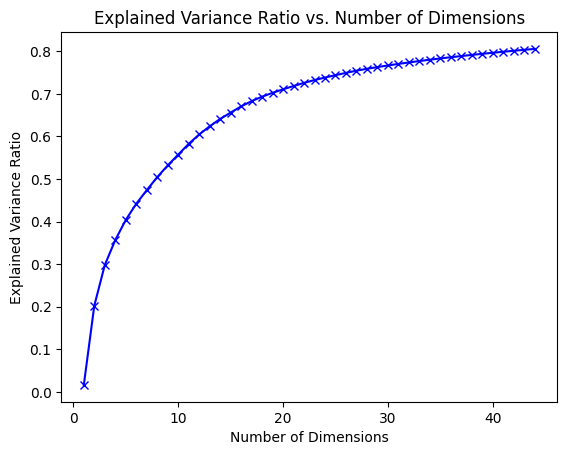

In [ ]:
# Plot the explained variance ratio as a function of number of dimensions
plt.plot(num_dimensions, explained_variances, 'bx-')
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Dimensions')
plt.show()

In [ ]:
from sklearn.decomposition import TruncatedSVD
number_dimensions = 20
lsa_model = TruncatedSVD(n_components=number_dimensions, random_state=420)
lsa_comps = lsa_model.fit_transform(tfidf_array)
print(lsa_model.explained_variance_ratio_.sum())

0.7106321990911998


In [ ]:
all_words = np.concatenate((transformer.named_transformers_['raw_text'].get_feature_names_out(),
                transformer.named_transformers_['Type of Vote'].get_feature_names_out(),
                transformer.named_transformers_['Policy_area'].get_feature_names_out(),
                transformer.named_transformers_['Title'].get_feature_names_out()))

In [ ]:
df_documents = pd.DataFrame(lsa_comps) #ya no son 4388 palabras, ahora cada columna es un componente de lsa (21 dimensiones, 21 temas) y cada columna es un documento
df_lsa = pd.DataFrame(lsa_model.components_,columns=all_words).T

## Create a model for each MEP--> EP7

---


Changes:
> max_features = 9000 the avg accuracy is 69% with logistic regression and 40 on SVD

> max_features = 9000 the avg accuracy is 71% with logistic regression and 40 on SVD


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary to store MEP names as keys and accuracy values as values
accuracy_results = {}

# Loop through each MEP column and train a separate model for each MEP
for col in EP7.columns[5:]:
    # Step 1: Prepare the data
    X = lsa_comps # Input features (TF-IDF + truncated SVD features)
    y = EP7[col].values # Target variable (voting behavior of the MEP)
    
    # Check the number of unique classes in the target variable
    num_classes = len(np.unique(y))
    if num_classes < 2:
        print(f"Skipping MEP {col} due to only one class present.")
        continue
    
    # Step 2: Split the data into training and testing sets
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Step 3: Choose and configure the model
    model = Pipeline([
        ('scaler', StandardScaler()), # You can apply additional preprocessing steps as needed
        ('classifier', RandomForestClassifier()) # Change the classifier as needed (e.g., DecisionTreeClassifier, RandomForestClassifier, SVC, MLPClassifier)
    ])
    
    # Step 4: Train the model
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    importances = np.zeros(X.shape[1])
    
    for train_idx, test_idx in cv.split(X, y):
        model.fit(X[train_idx], y[train_idx])
        importances += model.named_steps['classifier'].feature_importances_

    importances /= cv.n_splits
    feature_names = ['feature_' + str(i) for i in range(X.shape[1])]
    feature_importances = dict(zip(feature_names, importances))

    accuracy_results[col] = {'accuracy': np.mean(accuracy_scores), 'feature_importances': feature_importances}
# Convert the accuracy_results dictionary to a DataFrame
accuracy_df = pd.DataFrame.from_dict(accuracy_results, orient='index')

# Add the MEP column to the DataFrame
accuracy_df = accuracy_df.reset_index().rename(columns={'index': 'MEP'})

# Split the feature_importances column into separate columns for each feature
accuracy_df = accuracy_df.join(pd.DataFrame(accuracy_df['feature_importances'].to_dict()).T)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Skipping MEP 736 due to only one class present.
Skipping MEP 737 due to only one class present.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
accuracy_df.describe()

,accuracy,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,...,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000
mean,0.732221,0.060307,0.052098,0.054819,0.068233,0.054148,0.056456,0.045309,0.045371,0.051337,...,0.045018,0.050071,0.048456,0.046891,0.051454,0.044425,0.042693,0.046827,0.046715,0.046860
std,0.118966,0.007870,0.009006,0.009023,0.014105,0.008683,0.008123,0.003910,0.004257,0.004445,...,0.004768,0.006332,0.007939,0.007220,0.012886,0.004404,0.003921,0.004849,0.004442,0.004338
min,0.415138,0.044269,0.038476,0.026266,0.042854,0.025696,0.033323,0.024938,0.035273,0.040991,...,0.023087,0.038079,0.035198,0.031050,0.033983,0.030868,0.019964,0.021884,0.030883,0.023912
25%,0.643204,0.054145,0.046851,0.048752,0.058114,0.047599,0.050363,0.042981,0.042329,0.048018,...,0.042020,0.046033,0.043586,0.042783,0.044169,0.041840,0.040605,0.043938,0.044033,0.044487
50%,0.747896,0.059471,0.050227,0.053568,0.066591,0.053775,0.055239,0.044898,0.044860,0.051044,...,0.045068,0.048539,0.047636,0.046336,0.046869,0.044133,0.043051,0.047161,0.046525,0.047185
75%,0.830316,0.065150,0.054076,0.059193,0.076649,0.060164,0.062054,0.047338,0.047986,0.054167,...,0.047891,0.052039,0.051688,0.050319,0.053873,0.046445,0.045191,0.049809,0.049423,0.049278
max,0.992782,0.103654,0.102861,0.109299,0.118793,0.082839,0.094863,0.064112,0.066181,0.070419,...,0.060250,0.088275,0.131433,0.126279,0.165354,0.083484,0.054242,0.065334,0.068454,0.062660


In [ ]:
# Get the minimum and maximum accuracy values
min_accuracy = accuracy_df['accuracy'].min()
max_accuracy = accuracy_df['accuracy'].max()
median_accuracy = accuracy_df['accuracy'].median()
mean_accuracy = accuracy_df['accuracy'].mean()

# Print the results
print(f"Minimum Accuracy: {min_accuracy}")
print(f"Maximum Accuracy: {max_accuracy}")
print(f"Median Accuracy: {median_accuracy}")
print(f"Mean Accuracy: {mean_accuracy}")


Minimum Accuracy: 0.41513802959586094
Maximum Accuracy: 0.9927819385650711
Median Accuracy: 0.7478960888599442
Mean Accuracy: 0.7322207749918593


## Inspect accuracy by Party (Europarties EPG)

In [ ]:
accuracy_df.dtypes
accuracy_df['MEP'] = accuracy_df['MEP'].astype('int64')

In [ ]:
EP7_2

,Unnamed: 0,MEP ID,Fname,Lname,FullName,Country,Party,EPG,Start,End,...,6954,6955,6956,6957,6958,6959,6960,6961,6962,6963
0,0,1,Damien,ABAD,"ABAD, Damien",France,Nouveau Centre,Group of the European People's Party (Christia...,2009-07-14,2012-06-16,...,0,0,0,0,0,0,0,0,0,0
1,1,2,János,ÁDER,"ÁDER, János",Hungary,Fidesz-Magyar Polgári Szövetség-Keresztény Dem...,Group of the European People's Party (Christia...,2009-07-14,2012-05-09,...,0,0,0,0,0,0,0,0,0,0
2,2,3,John Stuart,AGNEW,"AGNEW, John Stuart",United Kingdom,United Kingdom Independence Party,Europe of freedom and democracy Group,2009-07-14,2014-12-31,...,3,2,1,3,2,1,3,3,1,5
3,3,4,Gabriele,ALBERTINI,"ALBERTINI, Gabriele",Italy,Il Popolo della Libertà,Group of the European People's Party (Christia...,2009-07-14,2013-03-14,...,0,0,0,0,0,0,0,0,0,0
4,4,5,Jan Philipp,ALBRECHT,"ALBRECHT, Jan Philipp",Germany,Bündnis 90/Die Grünen,Group of the Greens/European Free Alliance,2009-07-14,2014-12-31,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,848,849,Rina Ronja,KARI,"KARI, Rina Ronja",Denmark,Folkebevægelsen mod EU,Confederal Group of the European United Left -...,2014-02-05,2014-12-31,...,2,1,3,1,1,1,1,1,2,5
849,849,850,Giovanni,BARBAGALLO,"BARBAGALLO, Giovanni",Italy,Partito Democratico,Group of the Progressive Alliance of Socialist...,2014-03-11,2014-12-31,...,4,4,4,4,4,4,4,4,4,4
850,850,851,Annette,KOEWIUS,"KOEWIUS, Annette",Germany,Christlich Demokratische Union Deutschlands,Group of the European People's Party (Christia...,2014-03-12,2014-12-31,...,2,2,1,1,1,1,2,2,1,5
851,851,852,Katrin,SAKS,"SAKS, Katrin",Estonia,Sotsiaaldemokraatlik Erakond,Group of the Progressive Alliance of Socialist...,2014-04-07,2014-12-31,...,2,1,2,1,1,1,1,1,2,5


In [ ]:
EP7_accuracies = accuracy_df.merge( EP7_2[['EPG', 'MEP ID','Country']], how = "left", left_on = "MEP", right_on = "MEP ID" )
EP7_accuracies = EP7_accuracies.drop(["feature_importances","MEP ID"],axis=1)


In [ ]:
EP7_accuracies

,MEP,accuracy,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,EPG,Country
0,1,0.652220,0.064513,0.051361,0.055286,0.053909,0.043916,0.049042,0.045269,0.051481,...,0.051927,0.056364,0.064353,0.044662,0.044644,0.049148,0.043810,0.044816,Group of the European People's Party (Christia...,France
1,2,0.695541,0.058687,0.048622,0.053804,0.056054,0.046417,0.052659,0.045134,0.053200,...,0.054802,0.053099,0.068623,0.040629,0.043241,0.046061,0.043854,0.045773,Group of the European People's Party (Christia...,Hungary
2,3,0.733451,0.070294,0.047841,0.055215,0.071677,0.060179,0.057321,0.042949,0.039404,...,0.047020,0.045052,0.043179,0.051839,0.042230,0.047482,0.045700,0.046598,Europe of freedom and democracy Group,United Kingdom
3,4,0.643820,0.059162,0.049141,0.048817,0.064242,0.049029,0.050629,0.041599,0.050753,...,0.051013,0.051755,0.063031,0.041073,0.045178,0.052048,0.044147,0.047713,Group of the European People's Party (Christia...,Italy
4,5,0.726843,0.050189,0.050830,0.053165,0.068377,0.061710,0.057595,0.044589,0.047188,...,0.044175,0.045291,0.049319,0.046262,0.046667,0.048566,0.049113,0.047280,Group of the Greens/European Free Alliance,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,849,0.836354,0.054872,0.062639,0.061379,0.043906,0.043834,0.048634,0.046343,0.044395,...,0.055521,0.041340,0.056157,0.052320,0.036504,0.043668,0.041491,0.048443,Confederal Group of the European United Left -...,Denmark
847,850,0.894701,0.050641,0.059174,0.076100,0.044403,0.042137,0.053985,0.043860,0.046565,...,0.054878,0.039839,0.050915,0.058221,0.036742,0.049620,0.037237,0.048720,Group of the Progressive Alliance of Socialist...,Italy
848,851,0.913353,0.052389,0.065244,0.077909,0.043317,0.041064,0.057099,0.043615,0.040997,...,0.058157,0.040316,0.050149,0.062400,0.034506,0.039695,0.036370,0.045881,Group of the European People's Party (Christia...,Germany
849,852,0.950658,0.051235,0.063170,0.052690,0.051393,0.054902,0.044985,0.052106,0.043708,...,0.048357,0.055712,0.048725,0.064464,0.040869,0.047098,0.044836,0.057245,Group of the Progressive Alliance of Socialist...,Estonia


In [ ]:
EP7_accuracies.isna().sum()

MEP           0
accuracy      0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
EPG           0
Country       0
dtype: int64

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/EP7_accuracies2.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 EP7_accuracies.to_csv(f)
 #all MEPs with their accuracy, features, EPG and country

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/lsa2_EP7.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 df_lsa.to_csv(f)
 #all words by topics

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/docs_EP7.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 df_documents.to_csv(f)
 #all documents by topics

# Construct the feature importance by country and by EPG and then save them to the Drive to use after

In [ ]:
EP7_countries= EP7_accuracies.groupby('Country').mean()
EP7_parties= EP7_accuracies.groupby('EPG').mean()

<ipython-input-33-1c53ff4ba73c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  EP7_countries= EP7_accuracies.groupby('Country').mean()
<ipython-input-33-1c53ff4ba73c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  EP7_parties= EP7_accuracies.groupby('EPG').mean()


In [ ]:
EP7_parties.head()

,MEP,accuracy,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
EPG,,,,,,,,,,,,,,,,,,,,,
Confederal Group of the European United Left - Nordic Green Left,510.888889,0.573045,0.056275,0.054495,0.063983,0.058603,0.047826,0.049703,0.045636,0.046720,...,0.046902,0.048436,0.050569,0.051680,0.052487,0.045322,0.043961,0.047608,0.046443,0.045980
Europe of freedom and democracy Group,389.909091,0.594686,0.055927,0.055553,0.055489,0.063793,0.054253,0.053408,0.045100,0.044219,...,0.043741,0.050453,0.048907,0.051146,0.049646,0.047729,0.043913,0.047188,0.048155,0.047044
European Conservatives and Reformists Group,390.842105,0.582792,0.054271,0.076850,0.068069,0.065043,0.053436,0.052355,0.044851,0.041031,...,0.042133,0.048368,0.044734,0.054327,0.044297,0.042776,0.042236,0.045442,0.044885,0.044706
Group of the Alliance of Liberals and Democrats for Europe,422.602151,0.766463,0.062343,0.050277,0.055237,0.070103,0.054189,0.057377,0.044891,0.045964,...,0.045876,0.049374,0.048371,0.047112,0.050927,0.043284,0.042528,0.046534,0.047835,0.046405
Group of the European People's Party (Christian Democrats),423.840532,0.785704,0.061035,0.049997,0.052875,0.071569,0.053959,0.058886,0.046807,0.044802,...,0.044325,0.052758,0.048664,0.044529,0.052160,0.044507,0.042235,0.045584,0.045248,0.046228


In [ ]:
EP7_countries.drop(["MEP","accuracy"],axis=1,inplace=True)
EP7_parties.drop(["MEP","accuracy"],axis=1,inplace=True)
EP7_countries = pd.DataFrame(EP7_countries.reset_index())
EP7_parties = pd.DataFrame(EP7_parties.reset_index())


In [ ]:
# Transpose the entire DataFrame
EP7_countriesT = EP7_countries.T
EP7_partiesT = EP7_parties.T



In [ ]:
# Reset the column names to be the first row of the transposed DataFrame
EP7_partiesT.columns = EP7_partiesT.iloc[0]
EP7_countriesT.columns = EP7_countriesT.iloc[0]



In [ ]:
EP7_partiesT = EP7_partiesT.drop(EP7_partiesT.index[0])
EP7_countriesT = EP7_countriesT.drop(EP7_countriesT.index[0])



In [ ]:
EP7_partiesT = EP7_partiesT.reset_index()
EP7_countriesT = EP7_countriesT.reset_index()

In [ ]:
EP7_partiesT = EP7_partiesT.rename(columns={"index": "features"})
EP7_countriesT = EP7_countriesT.rename(columns={"index": "features"})

In [ ]:
# Drop the first row of the transposed DataFrame, since it is now redundant

EP7_partiesT = EP7_partiesT.rename_axis(None, axis="index")
EP7_countriesT = EP7_countriesT.rename_axis(None, axis="index")

In [ ]:
EP7_countriesT.head()

Country,features,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,...,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,United Kingdom
0,feature_0,0.060307,0.061173,0.063335,0.064524,0.058331,0.059427,0.05659,0.059855,0.061628,...,0.059923,0.061454,0.059633,0.064566,0.061419,0.06464,0.061413,0.060399,0.061694,0.05962
1,feature_1,0.049494,0.050091,0.049411,0.060191,0.054252,0.061322,0.054271,0.049098,0.05103,...,0.052433,0.051007,0.055131,0.049232,0.049959,0.049174,0.050172,0.049339,0.0508,0.06098
2,feature_2,0.052425,0.053279,0.051206,0.053297,0.057206,0.058722,0.055829,0.051609,0.053914,...,0.053922,0.053475,0.055797,0.05445,0.051785,0.050836,0.054082,0.053284,0.057796,0.060861
3,feature_3,0.072609,0.071645,0.070798,0.044703,0.058271,0.065861,0.066289,0.072976,0.061828,...,0.05401,0.065055,0.067391,0.072681,0.066507,0.072226,0.069819,0.069654,0.068983,0.066909
4,feature_4,0.056406,0.056893,0.055196,0.042536,0.049057,0.054849,0.056247,0.06283,0.050045,...,0.046554,0.055148,0.05469,0.056945,0.052679,0.05795,0.051339,0.053495,0.053422,0.054414


In [ ]:
EP7_partiesT.head()

EPG,features,Confederal Group of the European United Left - Nordic Green Left,Europe of freedom and democracy Group,European Conservatives and Reformists Group,Group of the Alliance of Liberals and Democrats for Europe,Group of the European People's Party (Christian Democrats),Group of the Greens/European Free Alliance,Group of the Progressive Alliance of Socialists and Democrats in the European Parliament,Non-attached Members
0,feature_0,0.056275,0.055927,0.054271,0.062343,0.061035,0.05632,0.062993,0.058603
1,feature_1,0.054495,0.055553,0.07685,0.050277,0.049997,0.050201,0.048706,0.053095
2,feature_2,0.063983,0.055489,0.068069,0.055237,0.052875,0.054915,0.051419,0.057372
3,feature_3,0.058603,0.063793,0.065043,0.070103,0.071569,0.060203,0.06968,0.062745
4,feature_4,0.047826,0.054253,0.053436,0.054189,0.053959,0.054622,0.056442,0.049848


In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/partiesEP7.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  EP7_partiesT.to_csv(f, index=False)


In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/countriesEP7.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  EP7_countriesT.to_csv(f, index=False)


## Preprocessing of the data EP8

In [ ]:
EP8["raw_text"].isna().sum() #quitar las instancias que no tienen texto


0

In [ ]:
print(EP8["Type of Vote"].isna().sum())
print(EP8["Policy_area"].isna().sum())
print(EP8["Title"].isna().sum())

0
1
0


In [ ]:
# Fill NaN values with empty strings
EP8.fillna('', inplace=True)


In [ ]:
EP8.shape

(2069, 863)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
# define the columns to transform
text_columns = ['raw_text', 'Type of Vote', 'Policy_area', 'Title']

# define the transformer
transformer = ColumnTransformer(
    transformers=[
        ('raw_text', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'raw_text'),
        ('Type of Vote', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'Type of Vote'),
        ('Policy_area', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'Policy_area'),
        ('Title', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, lowercase=True, strip_accents='unicode', min_df=0.05, max_df=0.9, max_features=9000, ngram_range=(1,3)), 'Title')
    ])

# fit and transform the data
tfidf_array = transformer.fit_transform(EP8[text_columns])




/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# get the feature names for the raw_text column
features = transformer.named_transformers_['raw_text'].get_feature_names_out()
features2 = transformer.named_transformers_['Type of Vote'].get_feature_names_out()
features3 = transformer.named_transformers_['Policy_area'].get_feature_names_out()
features4 = transformer.named_transformers_['Title'].get_feature_names_out()

# print the feature names
print(features)
print(features2)
print(features3)
print(features4)

['ability' 'able' 'abroad' ... 'zvan' 'zvan popa' 'zver']
['decision' 'draft' 'draft legislative' 'draft legislative resolution'
 'legislative' 'legislative resolution' 'motion' 'motion resolution'
 'proposal' 'proposal decision' 'resolution']
['affair' 'budget' 'budgetary' 'budgetary control' 'civil' 'civil liberty'
 'civil liberty justice' 'control' 'economic' 'economic monetary'
 'economic monetary affair' 'environment' 'environment public'
 'environment public health' 'foreign' 'foreign security'
 'foreign security policy' 'health' 'home' 'home affair' 'internal'
 'international' 'international trade' 'justice' 'justice home'
 'justice home affair' 'legal' 'legal affair' 'liberty' 'liberty justice'
 'liberty justice home' 'monetary' 'monetary affair' 'policy' 'public'
 'public health' 'security' 'security policy' 'trade']
['agency' 'agreement' 'budget' 'cooperation' 'discharge'
 'discharge european' 'european' 'fund' 'general' 'union']


In [ ]:
print(tfidf_array.shape)

(2069, 9060)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Define the range of dimensions to test
num_dimensions = range(1, 40)

# Store the explained variance ratio for each number of dimensions
explained_variances = []
for i in num_dimensions:
    lsa_model = TruncatedSVD(n_components=i, random_state=420)
    lsa_comps = lsa_model.fit_transform(tfidf_array)
    explained_variances.append(lsa_model.explained_variance_ratio_.sum())
    print(i, lsa_model.explained_variance_ratio_.sum())




1 0.019664615255697147
2 0.18528168085941563
3 0.32119101930557714
4 0.37460592615732563
5 0.41582152838724734
6 0.4500735086810249
7 0.48075040666314806
8 0.5111856757127687
9 0.5381563810990347
10 0.5635887149893632
11 0.5859011809456481
12 0.6065133524517181
13 0.6246185405279879
14 0.6400557084533854
15 0.6544303694938358
16 0.6672920845774453
17 0.6794189416657707
18 0.6909170794734059
19 0.7005583564948625
20 0.7099465402220413
21 0.7191294514196763
22 0.727179611591255
23 0.7339028852274136
24 0.7401057421384698
25 0.7459403720793898
26 0.7515806833253481
27 0.7570021306006137
28 0.7623719696887803
29 0.7673735331188718
30 0.7720906772411187
31 0.7764419057262604
32 0.7806690762142735
33 0.7847761708175706
34 0.7884993036372943
35 0.7920017812627472
36 0.7954522268521382
37 0.7988137916660896
38 0.8018468952140136
39 0.804824777134398


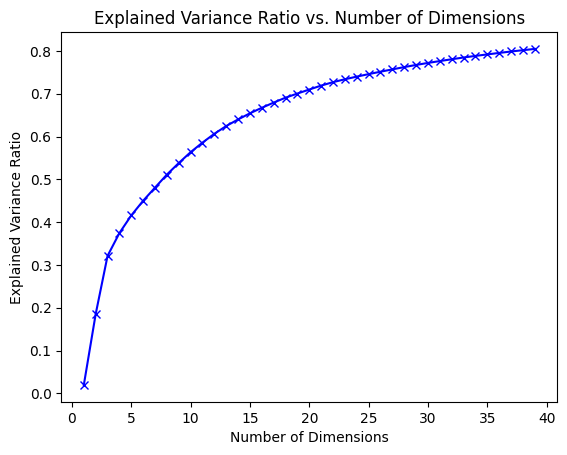

In [ ]:
# Plot the explained variance ratio as a function of number of dimensions
plt.plot(num_dimensions, explained_variances, 'bx-')
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Dimensions')
plt.show()

In [ ]:
from sklearn.decomposition import TruncatedSVD
number_dimensions = 21
lsa_model = TruncatedSVD(n_components=number_dimensions, random_state=420)
lsa_comps = lsa_model.fit_transform(tfidf_array)
print(lsa_model.explained_variance_ratio_.sum())

0.7191294514196763


In [ ]:
all_words = np.concatenate((transformer.named_transformers_['raw_text'].get_feature_names_out(),
                transformer.named_transformers_['Type of Vote'].get_feature_names_out(),
                transformer.named_transformers_['Policy_area'].get_feature_names_out(),
                transformer.named_transformers_['Title'].get_feature_names_out()))

In [ ]:
df_documents = pd.DataFrame(lsa_comps) #ya no son 4388 palabras, ahora cada columna es un componente de lsa (21 dimensiones, 21 temas) y cada columna es un documento
df_lsa = pd.DataFrame(lsa_model.components_,columns=all_words).T

## Create a model for each MEP--> EP8

---


Changes:
> max_features = 9000 the avg accuracy is 69% with logistic regression and 40 on SVD

> max_features = 9000 the avg accuracy is 71% with logistic regression and 40 on SVD


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary to store MEP names as keys and accuracy values as values
accuracy_results = {}

# Loop through each MEP column and train a separate model for each MEP
for col in EP8.columns[5:]:
    # Step 1: Prepare the data
    X = lsa_comps # Input features (TF-IDF + truncated SVD features)
    y = EP8[col].values # Target variable (voting behavior of the MEP)
    
    # Check the number of unique classes in the target variable
    num_classes = len(np.unique(y))
    if num_classes < 2:
        print(f"Skipping MEP {col} due to only one class present.")
        continue
    
    # Step 2: Split the data into training and testing sets
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Step 3: Choose and configure the model
    model = Pipeline([
        ('scaler', StandardScaler()), # You can apply additional preprocessing steps as needed
        ('classifier', RandomForestClassifier()) # Change the classifier as needed (e.g., DecisionTreeClassifier, RandomForestClassifier, SVC, MLPClassifier)
    ])
    
    # Step 4: Train the model
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    importances = np.zeros(X.shape[1])
    
    for train_idx, test_idx in cv.split(X, y):
        model.fit(X[train_idx], y[train_idx])
        importances += model.named_steps['classifier'].feature_importances_

    importances /= cv.n_splits
    feature_names = ['feature_' + str(i) for i in range(X.shape[1])]
    feature_importances = dict(zip(feature_names, importances))

    accuracy_results[col] = {'accuracy': np.mean(accuracy_scores), 'feature_importances': feature_importances}
# Convert the accuracy_results dictionary to a DataFrame
accuracy_df = pd.DataFrame.from_dict(accuracy_results, orient='index')

# Add the MEP column to the DataFrame
accuracy_df = accuracy_df.reset_index().rename(columns={'index': 'MEP'})

# Split the feature_importances column into separate columns for each feature
accuracy_df = accuracy_df.join(pd.DataFrame(accuracy_df['feature_importances'].to_dict()).T)


In [ ]:
accuracy_df.describe()

,accuracy,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,...,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,0.738080,0.055108,0.061601,0.052763,0.046867,0.047661,0.049997,0.062352,0.045457,0.044654,...,0.042766,0.043344,0.046834,0.043626,0.041614,0.043336,0.042518,0.046502,0.049524,0.041607
std,0.119659,0.007128,0.013674,0.009602,0.007651,0.005067,0.006832,0.014076,0.004663,0.004814,...,0.005314,0.003642,0.004310,0.004796,0.002737,0.003497,0.003062,0.006124,0.006761,0.003303
min,0.428217,0.040511,0.044667,0.035800,0.036477,0.035481,0.038181,0.037231,0.032377,0.033501,...,0.031432,0.034030,0.034791,0.030218,0.033349,0.023427,0.026641,0.025366,0.026020,0.025308
25%,0.642100,0.049934,0.053145,0.046871,0.042669,0.044359,0.045332,0.052254,0.042497,0.041119,...,0.039895,0.041111,0.043997,0.040600,0.039821,0.040890,0.040766,0.042743,0.044932,0.039668
50%,0.754472,0.053787,0.057891,0.050367,0.045418,0.047005,0.048436,0.059648,0.044970,0.044032,...,0.041667,0.042805,0.046127,0.043045,0.041724,0.043295,0.042470,0.046070,0.048410,0.041787
75%,0.836148,0.059531,0.064774,0.054918,0.048833,0.049928,0.053275,0.070288,0.048351,0.047845,...,0.044089,0.044788,0.048994,0.045763,0.043386,0.045606,0.044106,0.050137,0.053060,0.043598
max,0.997100,0.085607,0.136459,0.098739,0.099610,0.074391,0.081174,0.126446,0.065742,0.072027,...,0.076183,0.070042,0.069422,0.073615,0.049704,0.055218,0.054298,0.089370,0.071340,0.051079


In [ ]:
# Get the minimum and maximum accuracy values
min_accuracy = accuracy_df['accuracy'].min()
max_accuracy = accuracy_df['accuracy'].max()
median_accuracy = accuracy_df['accuracy'].median()
mean_accuracy = accuracy_df['accuracy'].mean()

# Print the results
print(f"Minimum Accuracy: {min_accuracy}")
print(f"Maximum Accuracy: {max_accuracy}")
print(f"Median Accuracy: {median_accuracy}")
print(f"Mean Accuracy: {mean_accuracy}")


Minimum Accuracy: 0.42821700529880335
Maximum Accuracy: 0.9971002795615913
Median Accuracy: 0.7544724006035723
Mean Accuracy: 0.7380797417819228


## Inspect accuracy by Party (Europarties EPG)

In [ ]:
accuracy_df.dtypes
accuracy_df['MEP'] = accuracy_df['MEP'].astype('int64')

In [ ]:
EP8_accuracies = accuracy_df.merge( EP8_2[['EPG', 'WebisteEpID','Country']], how = "left", left_on = "MEP", right_on = "WebisteEpID" )
EP8_accuracies = EP8_accuracies.drop(["feature_importances","WebisteEpID"],axis=1)


In [ ]:
EP8_accuracies

,MEP,accuracy,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,EPG,Country
0,124990,0.607533,0.053670,0.047680,0.060081,0.053468,0.046080,0.060997,0.059369,0.044423,...,0.041845,0.037103,0.042429,0.042628,0.048048,0.051612,0.049728,0.041573,NaN,Sweden
1,124831,0.638471,0.051687,0.049470,0.047080,0.042243,0.047044,0.052800,0.055855,0.041497,...,0.047416,0.044324,0.045621,0.045905,0.041673,0.047711,0.046602,0.044743,Europe of Freedom and Direct Democracy Group,Italy
2,124797,0.643310,0.060470,0.054101,0.047983,0.043092,0.044961,0.054468,0.060013,0.042640,...,0.046423,0.046286,0.042298,0.044571,0.040678,0.047731,0.047332,0.043614,Group of the Greens/European Free Alliance,Italy
3,124811,0.608992,0.053440,0.048306,0.050367,0.042178,0.047721,0.053045,0.052055,0.044124,...,0.046622,0.044175,0.043243,0.045052,0.041639,0.049261,0.048931,0.044038,Europe of Freedom and Direct Democracy Group,Italy
4,96897,0.684876,0.047861,0.072617,0.047880,0.049168,0.044564,0.044003,0.049118,0.045879,...,0.049909,0.050402,0.044886,0.043912,0.041853,0.047804,0.052966,0.043499,Europe of Freedom and Direct Democracy Group,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,196042,0.906716,0.047548,0.052388,0.054681,0.039406,0.039257,0.068939,0.049137,0.045346,...,0.047168,0.035735,0.042143,0.039321,0.040068,0.045297,0.068470,0.042975,NaN,Latvia
851,195454,0.863707,0.044652,0.056085,0.052825,0.039778,0.038701,0.072021,0.046010,0.045017,...,0.047766,0.038134,0.043036,0.038598,0.042478,0.052740,0.064528,0.039343,NaN,Belgium
852,111033,0.868052,0.047721,0.048956,0.056848,0.040084,0.036855,0.072948,0.049183,0.046436,...,0.044056,0.037547,0.041111,0.037875,0.041725,0.051748,0.068223,0.040041,NaN,Latvia
853,28299,0.856453,0.046416,0.048625,0.051333,0.040991,0.037850,0.072708,0.048937,0.048088,...,0.043995,0.038491,0.042781,0.038756,0.042980,0.052633,0.064940,0.039906,NaN,Poland


In [ ]:
EP8_accuracies.isna().sum()

MEP             0
accuracy        0
feature_0       0
feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
feature_6       0
feature_7       0
feature_8       0
feature_9       0
feature_10      0
feature_11      0
feature_12      0
feature_13      0
feature_14      0
feature_15      0
feature_16      0
feature_17      0
feature_18      0
feature_19      0
feature_20      0
EPG           104
Country         0
dtype: int64

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/EP8_accuracies2.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 EP8_accuracies.to_csv(f)
 #all MEPs with their accuracy, features, EPG and country

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/lsa2_EP8.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 df_lsa.to_csv(f)
 #all words by topics

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/docs_EP8.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 df_documents.to_csv(f)
 #all documents by topics

# Construct the feature importance by country and by EPG and then save them to the Drive to use after

In [ ]:
EP8_countries= EP8_accuracies.groupby('Country').mean()
EP8_parties= EP8_accuracies.groupby('EPG').mean()

<ipython-input-32-680c1418651b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  EP8_countries= EP8_accuracies.groupby('Country').mean()
<ipython-input-32-680c1418651b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  EP8_parties= EP8_accuracies.groupby('EPG').mean()


In [ ]:
EP8_parties.head()

,MEP,accuracy,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
EPG,,,,,,,,,,,,,,,,,,,,,
Confederal Group of the European United Left - Nordic Green Left,109090.784314,0.560276,0.050708,0.061010,0.047584,0.052109,0.048299,0.046047,0.048833,0.047360,...,0.051032,0.043648,0.049272,0.045767,0.044398,0.044155,0.043808,0.047290,0.047839,0.043091
Europe of Freedom and Direct Democracy Group,120291.714286,0.621246,0.050293,0.059810,0.049741,0.046137,0.046233,0.048746,0.055560,0.046922,...,0.050561,0.043795,0.048970,0.046067,0.043375,0.044621,0.042646,0.047756,0.048578,0.043971
Europe of Nations and Freedom Group,124504.314286,0.609430,0.050883,0.059639,0.054090,0.051294,0.046372,0.049178,0.054831,0.048021,...,0.044774,0.043827,0.046857,0.046906,0.042687,0.047339,0.042818,0.047396,0.047324,0.042679
European Conservatives and Reformists Group,94816.479452,0.615246,0.051532,0.091258,0.073278,0.047229,0.051311,0.045662,0.048288,0.040921,...,0.040865,0.042071,0.053838,0.041609,0.039099,0.043496,0.042523,0.042695,0.043050,0.039768
Group of the Alliance of Liberals and Democrats for Europe,102264.529412,0.797798,0.057472,0.058013,0.051167,0.044610,0.047430,0.049469,0.070055,0.046757,...,0.041734,0.041659,0.043842,0.042067,0.040337,0.043547,0.042354,0.047049,0.050879,0.040593


In [ ]:
EP8_countries.drop(["MEP","accuracy"],axis=1,inplace=True)
EP8_parties.drop(["MEP","accuracy"],axis=1,inplace=True)
EP8_countries = pd.DataFrame(EP8_countries.reset_index())
EP8_parties = pd.DataFrame(EP8_parties.reset_index())


In [ ]:
# Transpose the entire DataFrame
EP8_countriesT = EP8_countries.T
EP8_partiesT = EP8_parties.T



In [ ]:
# Reset the column names to be the first row of the transposed DataFrame
EP8_partiesT.columns = EP8_partiesT.iloc[0]
EP8_countriesT.columns = EP8_countriesT.iloc[0]



In [ ]:
EP8_partiesT = EP8_partiesT.drop(EP8_partiesT.index[0])
EP8_countriesT = EP8_countriesT.drop(EP8_countriesT.index[0])



In [ ]:
EP8_partiesT = EP8_partiesT.reset_index()
EP8_countriesT = EP8_countriesT.reset_index()

In [ ]:
EP8_partiesT = EP8_partiesT.rename(columns={"index": "features"})
EP8_countriesT = EP8_countriesT.rename(columns={"index": "features"})

In [ ]:
# Drop the first row of the transposed DataFrame, since it is now redundant
EP8_partiesT = EP8_partiesT.rename_axis(None, axis="index")
EP8_countriesT = EP8_countriesT.rename_axis(None, axis="index")

In [ ]:
EP8_countriesT.shape


(21, 29)

In [ ]:
EP8_partiesT.shape

(21, 10)

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/partiesEP8.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  EP8_partiesT.to_csv(f, index=False)


In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/countriesEP8.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  EP8_countriesT.to_csv(f, index=False)
